In [20]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

## Seasonal-Trend Decomposition using LOESS (STL)


#### Read the Data


In [21]:
ice_cream_interest = pd.read_csv('ice_cream_interest.csv')
ice_cream_interest.head()


,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22


In [22]:
ice_cream_interest.set_index('month', inplace=True)
ice_cream_interest.index = pd.to_datetime(ice_cream_interest.index)

In [23]:
pd.infer_freq(ice_cream_interest.index)

'MS'

In [24]:
ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))
ice_cream_interest

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


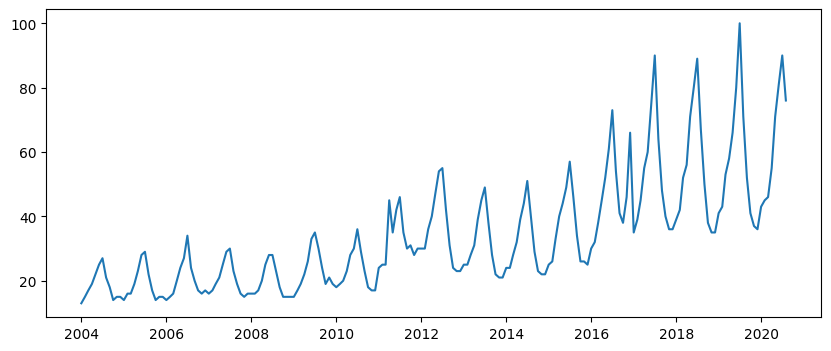

In [25]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

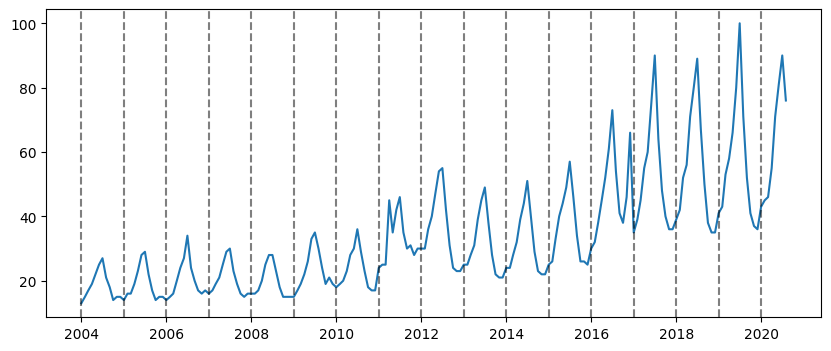

In [26]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

- Visual Inspection: Mid-2011 and Late-2016


## Perform STL Decomp


In [27]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [28]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid


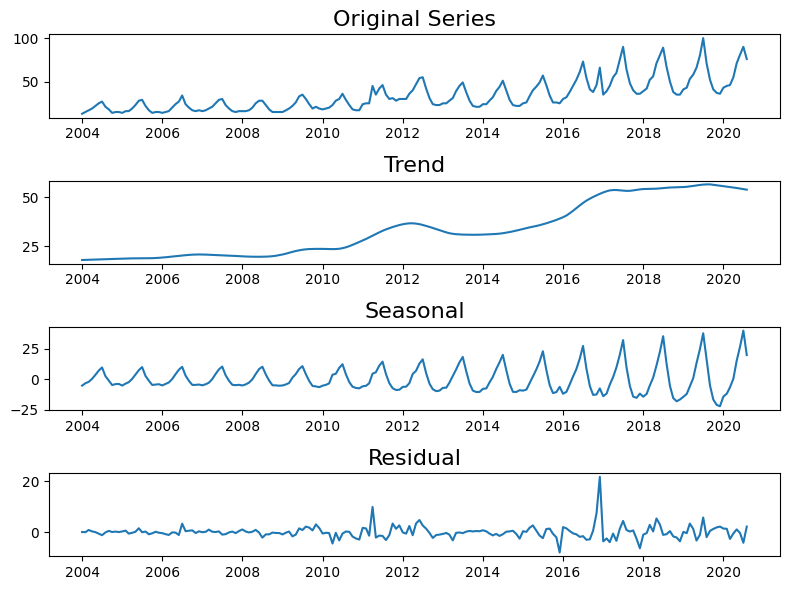

In [29]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

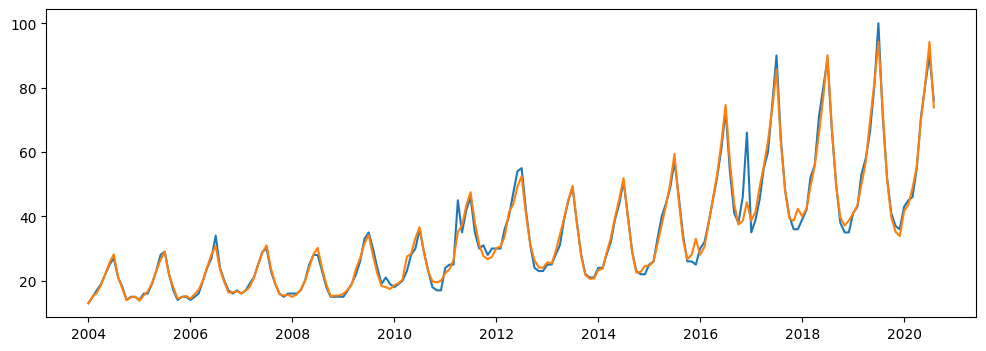

In [30]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

#### Anomaly Detection


In [31]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

In [32]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

In [33]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]
anomalies.head()

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66


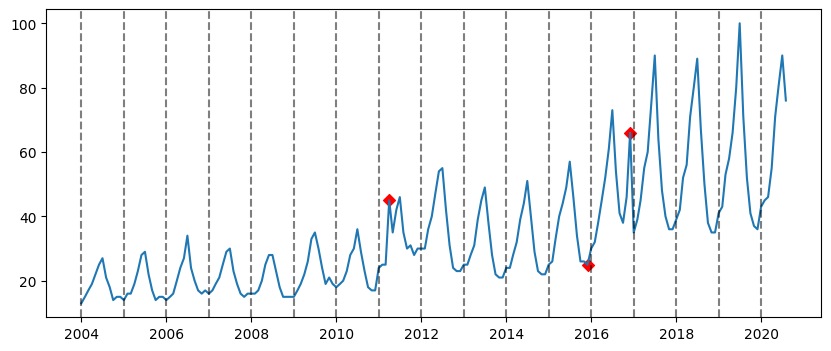

In [34]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')